Avaliação dos Algoritmos

Naive Bayes: 93.80
Arvore de decisão: 98.20
Random Forest: 98.40
Regras: 97.40
Knn: 98.60
Regressão Logística: 94.60
SVM: 98.80
Redes Neurais: 99.60

Tuning dos parametros com GridSearch

Preparação dos dados

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import pickle

In [7]:
with open('../credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [8]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [9]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [10]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis = 0)
x_credit.shape

(2000, 3)

In [11]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

Árvore de decisão

In [12]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [13]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.9845


Random Forest

In [14]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [15]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.9865


Knn

In [16]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [17]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


Regressão logística

In [18]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [19]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


SVM

In [20]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [21]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


Redes Neurais

In [22]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [23]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultado = grid_search.best_score_

/home/breno/Projetos/CursoMachineLearning/machine/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/breno/Projetos/CursoMachineLearning/machine/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/breno/Projetos/CursoMachineLearning/machine/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/breno/Projetos/CursoMachineLearning/machine/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

In [24]:
print(melhores_parametros)
print(melhores_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9964999999999999


Validação Cruzada

In [25]:
from sklearn.model_selection import cross_val_score, KFold

In [26]:
resultados_arvore = []
resultados_random_forest = []
resultados_Knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv = kfold)
    # print(scores)
    # print(scores.mean())
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv = kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, x_credit, y_credit, cv = kfold)
    resultados_Knn.append(scores.mean())

    logistica = LogisticRegression(C=1, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, x_credit, y_credit, cv = kfold)
    resultados_logistica.append(scores.mean())

    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural, x_credit, y_credit, cv=kfold)
    resultados_rede_neural.append(scores.mean())

/home/breno/Projetos/CursoMachineLearning/machine/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/breno/Projetos/CursoMachineLearning/machine/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/breno/Projetos/CursoMachineLearning/machine/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/breno/Projetos/CursoMachineLearning/machine/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

In [27]:
resultados_rede_neural

[0.9970000000000001,
 0.998,
 0.9964999999999999,
 0.9969999999999999,
 0.9974999999999999,
 0.9970000000000001,
 0.9964999999999999,
 0.9964999999999999,
 0.9964999999999999,
 0.9975000000000002,
 0.9964999999999999,
 0.9969999999999999,
 0.9964999999999999,
 0.9974999999999999,
 0.9964999999999999,
 0.998,
 0.9969999999999999,
 0.9970000000000001,
 0.9974999999999999,
 0.9974999999999999,
 0.9970000000000001,
 0.9984999999999999,
 0.9974999999999999,
 0.9974999999999999,
 0.9970000000000001,
 0.9969999999999999,
 0.9974999999999999,
 0.9964999999999999,
 0.9970000000000001,
 0.9974999999999999]

In [28]:
resultado = pd.DataFrame({'Arvore': resultados_arvore, 'Random_forest': resultados_random_forest,
                           'KNN': resultados_Knn, 'Logistica': resultados_logistica,
                           'SVN': resultados_svm, 'rede_neural': resultados_rede_neural})

In [29]:
resultado.describe()

,Arvore,Random_forest,KNN,Logistica,SVN,rede_neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987167,0.984000,0.980050,0.946950,0.985083,0.997133
std,0.001812,0.002396,0.001533,0.000687,0.001280,0.000524
min,0.982500,0.977500,0.977000,0.945500,0.982000,0.996500
25%,0.986000,0.982625,0.979000,0.946500,0.984125,0.996625
50%,0.987250,0.984750,0.980000,0.947000,0.985000,0.997000
75%,0.988375,0.985875,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.987000,0.982500,0.948500,0.987500,0.998500


In [33]:
resultado.var()

Arvore           3.281609e-06
Random_forest    5.741379e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVN              1.639368e-06
rede_neural      2.747126e-07
dtype: float64

In [34]:
( resultado.std() / resultado.mean()) * 100

Arvore           0.001835
Random_forest    0.002435
KNN              0.001564
Logistica        0.000725
SVN              0.001300
rede_neural      0.000526
dtype: float64

Teste de normalidade nos resusltados

In [ ]:
alpha = 0.05

In [38]:
from scipy.stats import shapiro
import seaborn as sns

In [37]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_Knn), shapiro(resultados_svm), shapiro(resultados_logistica), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9747499227523804, pvalue=0.6753608584403992),
 ShapiroResult(statistic=0.9214468002319336, pvalue=0.02924666926264763),
 ShapiroResult(statistic=0.9584026336669922, pvalue=0.28181564807891846),
 ShapiroResult(statistic=0.962294340133667, pvalue=0.35407164692878723),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.8834431171417236, pvalue=0.0033854355569928885))

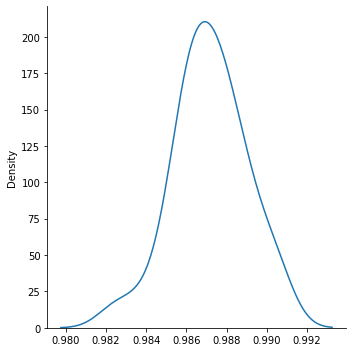

In [40]:
sns.displot(resultados_arvore, kind='kde');

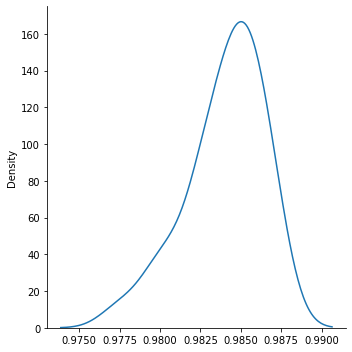

In [41]:
sns.displot(resultados_random_forest, kind='kde');

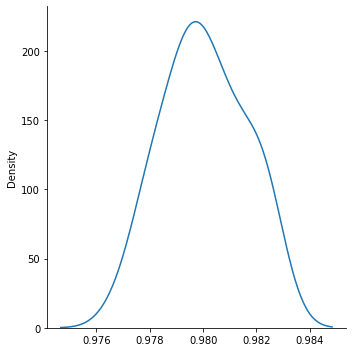

In [42]:
sns.displot(resultados_Knn, kind='kde');

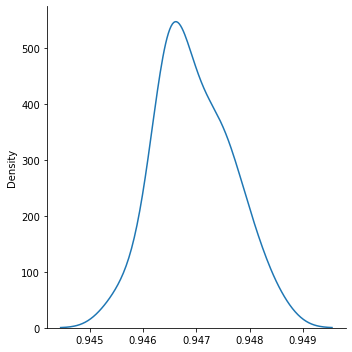

In [43]:
sns.displot(resultados_logistica, kind='kde');

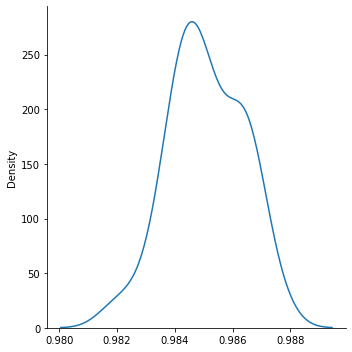

In [44]:
sns.displot(resultados_svm, kind='kde');

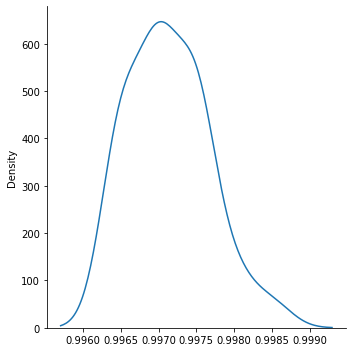

In [46]:
sns.displot(resultados_rede_neural, kind='kde');

Teste de Hipótese como ANOVA e tukey

In [47]:
from scipy.stats import f_oneway

In [52]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_Knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

2.756037001834638e-176

In [53]:
p

2.756037001834638e-176

In [54]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [55]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_Knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                        'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                      'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest',
                                      'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn',
                                      'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica',
                                      'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm',
                                      'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural']}

In [58]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9840,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9890,arvore
...,...,...
175,0.9970,rede_neural
176,0.9975,rede_neural
177,0.9965,rede_neural
178,0.9970,rede_neural


In [59]:
from statsmodels.stats.multicomp import MultiComparison

In [60]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [61]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071   -0.0 -0.0082  -0.006   True
       arvore     logistica  -0.0402   -0.0 -0.0413 -0.0391   True
       arvore random_forest  -0.0032    0.0 -0.0043  -0.002   True
       arvore   rede_neural     0.01   -0.0  0.0088  0.0111   True
       arvore           svm  -0.0021    0.0 -0.0032  -0.001   True
          knn     logistica  -0.0331   -0.0 -0.0342  -0.032   True
          knn random_forest    0.004   -0.0  0.0028  0.0051   True
          knn   rede_neural   0.0171   -0.0   0.016  0.0182   True
          knn           svm    0.005   -0.0  0.0039  0.0062   True
    logistica random_forest   0.0371   -0.0  0.0359  0.0382   True
    logistica   rede_neural   0.0502   -0.0  0.0491  0.0513   True
    logistica           svm   0.0381   -0.0   0.037  0.0393   

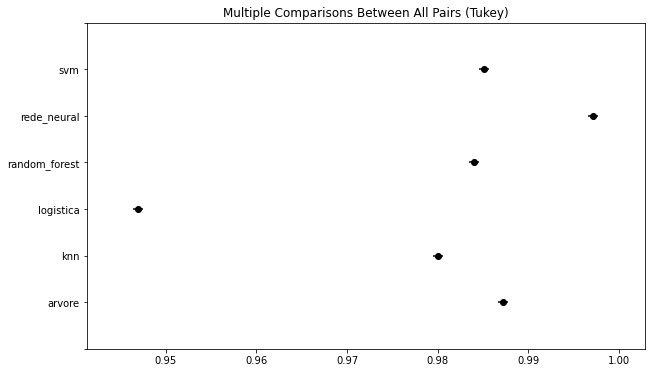

In [62]:
teste_estatistico.plot_simultaneous();